In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#Import data set
csv_path = "table1.csv"
df = pd.read_csv(csv_path)
df.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,110.5,114.9,121.7,126.2,124.2,132.0,138.1,134.9,134.2,...,120.7,133.5,130.6,123.8,121.5,123.8,120.6,115.5,109.7,113.5
1,Alaska,34.7,35.3,36.8,36.6,36.4,41.1,42.0,42.1,43.2,...,38.0,39.0,38.8,38.3,36.2,35.2,36.3,35.1,34.6,35.2
2,Arizona,63.2,64.1,66.9,69.2,71.9,66.8,68.7,71.8,76.8,...,93.8,95.7,93.8,91.8,95.7,93.6,91.3,87.4,86.5,90.4
3,Arkansas,51.2,50.1,51.7,50.8,54.7,58.1,60.7,59.6,61.1,...,61.7,66.1,67.6,66.3,68.8,69.4,59.5,62.7,64.6,71.5
4,California,359.2,346.7,351.1,340.4,356.6,345.4,344.0,346.5,357.1,...,368.0,362.7,348.6,353.1,356.0,353.1,360.7,361.2,363.0,363.0


In [3]:
#Show top CO2 contributors sorted by 2014 (relvant to other data sets)
df_sort=df.sort_values("2014", ascending=False)
df_sort.head(10)

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
43,Texas,578.4,574.2,578.3,594.9,597.5,600.2,645.2,667.8,674.8,...,583.3,620.6,638.3,626.3,657.5,664.1,659.7,663.8,678.9,701.9
4,California,359.2,346.7,351.1,340.4,356.6,345.4,344.0,346.5,357.1,...,368.0,362.7,348.6,353.1,356.0,353.1,360.7,361.2,363.0,363.0
38,Pennsylvania,263.9,256.3,265.1,268.9,266.2,268.7,274.7,275.9,264.9,...,243.7,255.7,248.4,237.5,247.4,247.1,230.7,217.8,217.9,221.6
13,Illinois,191.9,191.9,187.6,204.1,204.2,208.3,222.1,225.4,215.6,...,226.6,231.6,230.4,217.5,231.0,234.1,216.4,204.8,203.2,210.4
35,Ohio,246.1,244.5,249.0,253.6,249.9,252.3,264.8,260.3,258.8,...,236.3,248.5,236.7,216.6,231.0,232.9,214.0,207.7,206.9,208.8
9,Florida,189.2,190.4,192.8,195.9,203.3,208.5,214.2,219.3,232.4,...,224.7,242.8,229.7,223.4,222.5,228.3,232.6,230.4,229.4,231.2
14,Indiana,205.6,202.1,198.8,203.5,203.0,208.4,212.9,217.1,218.0,...,205.4,217.8,210.4,195.7,201.2,206.7,187.2,183.2,178.1,191.2
18,Louisiana,195.9,195.2,201.8,205.0,211.3,211.1,215.1,222.0,206.8,...,200.1,212.7,215.8,204.7,198.2,197.1,200.5,203.0,211.4,211.0
32,New York,208.2,200.5,199.0,194.3,192.2,197.8,200.5,204.9,203.4,...,172.1,173.9,164.1,160.4,162.1,169.8,167.7,163.7,158.4,167.7
22,Michigan,181.3,179.8,178.7,178.8,186.6,189.5,194.9,192.2,191.4,...,164.7,165.4,160.2,153.4,162.2,162.1,162.3,152.2,153.6,162.3


In [4]:
#Flip data set to show change over time
df_state = df_sort.set_index("State")
df_top10 = df_state.head(5)
df_flip = df_top10.transpose()
df_flip.head(10)

State,Texas,California,Pennsylvania,Illinois,Ohio
1990,578.4,359.2,263.9,191.9,246.1
1991,574.2,346.7,256.3,191.9,244.5
1992,578.3,351.1,265.1,187.6,249.0
1993,594.9,340.4,268.9,204.1,253.6
1994,597.5,356.6,266.2,204.2,249.9
1995,600.2,345.4,268.7,208.3,252.3
1996,645.2,344.0,274.7,222.1,264.8
1997,667.8,346.5,275.9,225.4,260.3
1998,674.8,357.1,264.9,215.6,258.8
1999,655.4,360.6,263.3,225.5,257.8


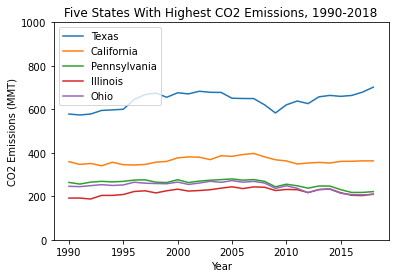

In [5]:
#Emissions have been largely constant over the given time interval
df_flip.plot(kind="line")
plt.title("Five States With Highest CO2 Emissions, 1990-2018")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (MMT)")
plt.ylim(0, 1000)
plt.legend(loc="upper left")
plt.savefig("output_images/EIATop5.png")

In [6]:
#Calculate individual state emissions totals across given years
df["Total"]=df.iloc[:, -51:-1].sum(axis=1)
df.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
0,Alabama,110.5,114.9,121.7,126.2,124.2,132.0,138.1,134.9,134.2,...,133.5,130.6,123.8,121.5,123.8,120.6,115.5,109.7,113.5,3651.8
1,Alaska,34.7,35.3,36.8,36.6,36.4,41.1,42.0,42.1,43.2,...,39.0,38.8,38.3,36.2,35.2,36.3,35.1,34.6,35.2,1123.5
2,Arizona,63.2,64.1,66.9,69.2,71.9,66.8,68.7,71.8,76.8,...,95.7,93.8,91.8,95.7,93.6,91.3,87.4,86.5,90.4,2382.4
3,Arkansas,51.2,50.1,51.7,50.8,54.7,58.1,60.7,59.6,61.1,...,66.1,67.6,66.3,68.8,69.4,59.5,62.7,64.6,71.5,1711.8
4,California,359.2,346.7,351.1,340.4,356.6,345.4,344.0,346.5,357.1,...,362.7,348.6,353.1,356.0,353.1,360.7,361.2,363.0,363.0,10181.5


In [7]:
#Total emissions for top 5 contributors and total for remaining states
total_TX = df_flip["Texas"].sum()
total_CA = df_flip["California"].sum()
total_PA = df_flip["Pennsylvania"].sum()
total_IL = df_flip["Illinois"].sum()
total_OH = df_flip["Ohio"].sum()

total_US = df["Total"].sum()
total_rem = total_US - (total_TX + total_CA + total_PA + total_IL + total_OH)

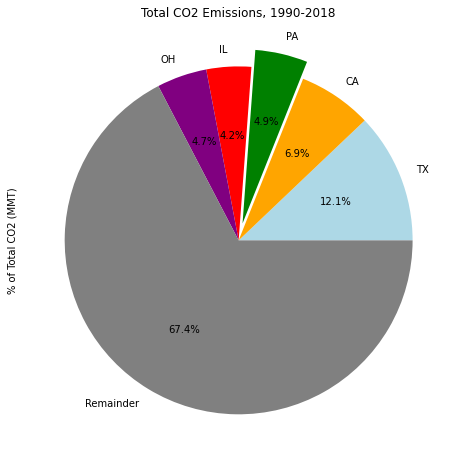

In [8]:
#Top 5 states represent 32.6% of CO2 emissions in these data
states = ["TX", "CA", "PA", "IL", "OH", "Remainder"]
totals = [total_TX, total_CA, total_PA, total_IL, total_OH, total_rem]
colors = ["lightblue","orange","green","red","purple", "gray"]
explode = [0, 0, 0.1, 0, 0, 0]

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.pie(totals, labels=states, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("Total CO2 Emissions, 1990-2018")
plt.ylabel("% of Total CO2 (MMT)")
plt.savefig("output_images/EIAPercs_All.png")

In [9]:
#Separate years relevant to other data sets
df_2014=df[["State","2010","2011","2012", "2013", "2014"]]
df_2014.head()

,State,2010,2011,2012,2013,2014
0,Alabama,133.5,130.6,123.8,121.5,123.8
1,Alaska,39.0,38.8,38.3,36.2,35.2
2,Arizona,95.7,93.8,91.8,95.7,93.6
3,Arkansas,66.1,67.6,66.3,68.8,69.4
4,California,362.7,348.6,353.1,356.0,353.1


In [10]:
#Sum of years in data slice
df_2014["Total"]=df_2014.iloc[:, -5:-1].sum(axis=1)
df_2014.head()

<ipython-input-10-320a4ae59131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014["Total"]=df_2014.iloc[:, -5:-1].sum(axis=1)


,State,2010,2011,2012,2013,2014,Total
0,Alabama,133.5,130.6,123.8,121.5,123.8,509.4
1,Alaska,39.0,38.8,38.3,36.2,35.2,152.3
2,Arizona,95.7,93.8,91.8,95.7,93.6,377.0
3,Arkansas,66.1,67.6,66.3,68.8,69.4,268.8
4,California,362.7,348.6,353.1,356.0,353.1,1420.4


In [11]:
df_2014_flip = df_2014.set_index("State").transpose()
df_2014_flip.head(6)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2010,133.5,39.0,95.7,66.1,362.7,95.9,36.3,11.3,3.2,242.8,...,15.1,110.0,620.6,64.0,5.9,108.9,73.5,101.3,98.6,65.5
2011,130.6,38.8,93.8,67.6,348.6,92.2,34.9,12.3,3.1,229.7,...,14.7,106.5,638.3,64.5,5.8,100.0,68.6,98.6,97.8,64.3
2012,123.8,38.3,91.8,66.3,353.1,91.1,34.1,13.4,2.7,223.4,...,15.0,100.1,626.3,61.8,5.5,98.0,68.3,92.9,90.6,66.6
2013,121.5,36.2,95.7,68.8,356.0,91.8,34.9,13.1,2.8,222.5,...,15.5,98.6,657.5,67.2,5.8,105.3,73.1,95.1,101.3,68.8
2014,123.8,35.2,93.6,69.4,353.1,92.3,35.2,12.8,3.0,228.3,...,15.5,104.1,664.1,65.5,5.9,104.4,71.6,100.8,101.5,65.8
Total,509.4,152.3,377.0,268.8,1420.4,371.0,140.2,50.1,11.8,918.4,...,60.3,415.2,2542.7,257.5,23.0,412.2,283.5,387.9,388.3,265.2


In [12]:
total_TX14=df_2014_flip.loc["Total","Texas"]
total_CA14=df_2014_flip.loc["Total","California"]
total_PA14=df_2014_flip.loc["Total","Pennsylvania"]
total_IL14=df_2014_flip.loc["Total","Illinois"]
total_OH14=df_2014_flip.loc["Total","Ohio"]

total_US14=df_2014_flip.loc["Total",:].sum()
total_rem14=total_US14 - (total_TX14 + total_CA14 + total_PA14 + total_IL14 + total_OH14)

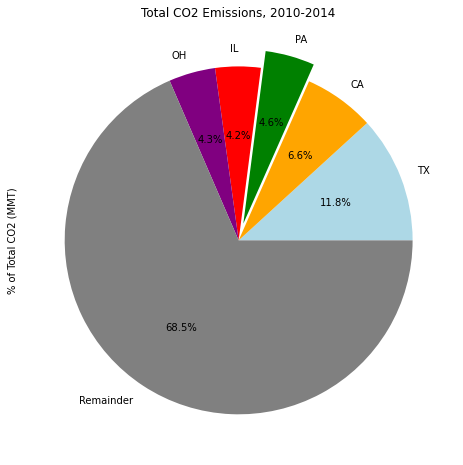

In [13]:
#Top 5 states account for 31.8% of emissions from 2010-2014
states = ["TX", "CA", "PA", "IL", "OH", "Remainder"]
totals = [total_TX14, total_CA14, total_PA14, total_IL14, total_OH14, total_rem14]
colors = ["lightblue","orange","green","red","purple", "gray"]
explode = [0, 0, 0.1, 0, 0, 0]

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.pie(totals, labels=states, colors=colors, explode=explode, autopct="%1.1f%%")
plt.title("Total CO2 Emissions, 2010-2014")
plt.ylabel("% of Total CO2 (MMT)")
plt.savefig("output_images/EIAPercs_2014.png")

In [14]:
#Find average state consumption
all50_2014=df_2014["Total"].sum()
all50_2014avg=all50_2014/51
all50_2014avg

423.0666666666667

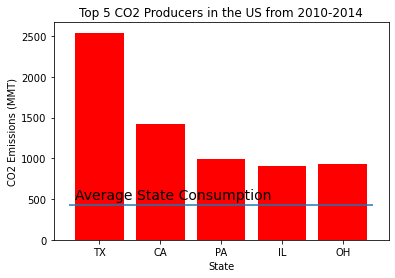

In [16]:
yvalues = [total_TX14, total_CA14, total_PA14, total_IL14, total_OH14]
labels = ["TX", "CA", "PA", "IL", "OH"]
x_axis = np.arange(len(yvalues))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, yvalues, color="red", align="center")
plt.xticks(tick_locations, labels)
plt.title("Top 5 CO2 Producers in the US from 2010-2014")
plt.hlines(y=all50_2014avg, xmin=-0.5, xmax=4.5)
plt.annotate("Average State Consumption", (-0.4, 500), fontsize=14)
plt.xlabel("State")
plt.ylabel("CO2 Emissions (MMT)")
plt.savefig("output_images/EIATop5_2014.png")